In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mapping import map_str_values
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

- Đọc dữ liệu

In [2]:
X_train = pd.read_csv("data/train_values.csv", index_col="building_id")
Y_train = pd.read_csv("data/train_labels.csv", index_col="building_id")

- Chuyển biến phân loại về dạng int để có thể áp dụng PCA

In [3]:
mapped_X = map_str_values(X_train)

- Scale bộ data sao cho các feature đều có mean = 0, std = 1

In [12]:
scaler = StandardScaler()
mapped_X = scaler.fit_transform(mapped_X)
mapped_X


array([[-0.98341369, -0.51870494,  1.6290546 , ..., -0.01207634,
        -0.00939496, -0.07173057],
       [-0.73445934,  0.48199788, -0.9450174 , ..., -0.01207634,
        -0.00939496, -0.07173057],
       [ 0.88374396, -0.81915808,  0.74461158, ..., -0.01207634,
        -0.00939496, -0.07173057],
       ...,
       [ 0.38583526, -1.57513697,  0.5224724 , ..., -0.01207634,
        -0.00939496, -0.07173057],
       [ 1.50612985, -1.60421308, -1.20856771, ..., -0.01207634,
        -0.00939496, -0.07173057],
       [ 0.88374396, -1.67690335,  0.77971505, ..., -0.01207634,
        -0.00939496, -0.07173057]])

In [14]:
pca = PCA(n_components=3, random_state=192)
X0 = pca.fit_transform(mapped_X)
X0.shape

(260601, 3)

In [ ]:
color_map = {
    1:"red",
    2:"green",
    3:"blue"
}

colors = Y_train["damage_grade"].map(color_map)

<Figure size 640x480 with 0 Axes>

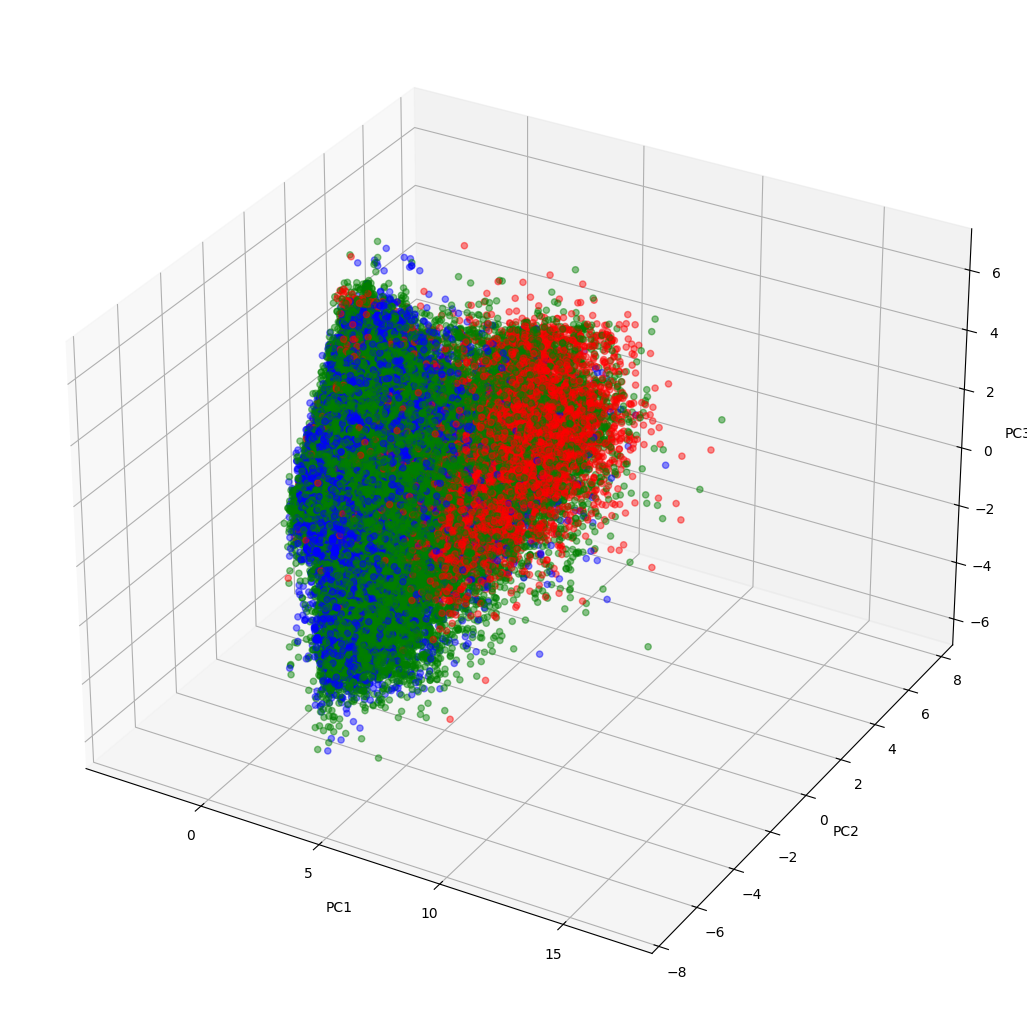

In [34]:
fig = plt.figure()
fig = plt.figure(figsize=(13, 14))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X0[:, 0], X0[:, 1], X0[:, 2], c=colors, marker="o", alpha=0.45)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()
